**Importing all necessary modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

**Creating a new random dataset.**

In [2]:
## We create a random dataset with the shape of (2000, 3) and with some noise
data = make_regression(n_samples = 2000, n_features = 3, noise = 20, random_state = 42)

In [3]:
## Data contains both features and targets. We get them all individually.
feature, target = data

In [4]:
## Dataset is in the numpy version and can be converted to Dataframe.
df = pd.DataFrame(feature, columns = ['feature1', 'feature2', 'feature3'])

In [5]:
## We create a new column and add target values to it
df['target'] = target

As we see that a new dataset was created randomly.

In [6]:
df.head()

,feature1,feature2,feature3,target
0,1.820544,-0.221537,-1.176962,-2.588824
1,-1.282992,0.477041,0.076822,1.143471
2,-0.302045,-0.263448,0.679143,-21.630399
3,-0.202524,1.181891,0.480908,43.622174
4,0.350630,0.513908,0.179582,4.435816


However, we will use DataFrame rarely. So, it is better to work with NumPy versions

In [7]:
X = feature

## The reason why we reshape is that fitting requires 2D array in most cases. 
## So, in this line, we get a new 2D version of target.
y = target.reshape(-1, 1)

**So you have randomly created dataset and you are also given the function of Batch Gradient Descent in the next cell. The function will return thetas in a matrix form that were obtained during the iterations. The last index of the matrix is the final thetas. Run the cell containing that function.**

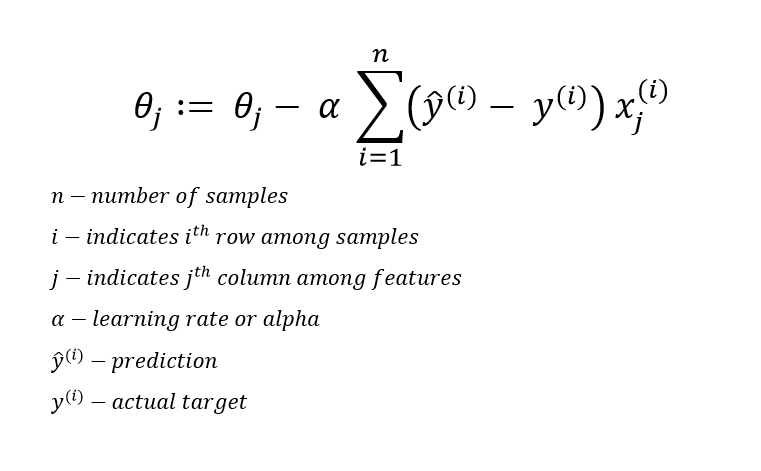

It is not required to understand Batch Gradient Descent approach now, however, for your interests, I have uploaded the formulas as images. You can try them all yourself. Do not forget to pay attention to shapes! Let's say you have **(2000, 3)** dataset of features, then, of course, you must have **(2000, 1)** as your targets. So, you should generate thetas with the shape of **(4, 1)** . The reason why it is 4 is that we should also consider the intercept.

Paying attention to shapes here is very important to generate optimal thetas correctly.

Run the following cell

In [8]:
def batch_gradient_descent(X, y, iterations = 1000, alpha = 0.01):    
    X = X.copy()
    
    ## Adding a new column as one vector to produce intercept later
    ones = np.ones((X.shape[0], 1))
    X = np.concatenate((ones, X), axis = 1)
    
    ## Initializing random values of thetas
    thetas = np.random.randn(X.shape[1], 1)
    
    ## Array to store trial thetas
    trial_thetas = np.zeros((iterations, X.shape[1], 1))

    ## The beginning of the procedure
    for i in range(iterations):
        
        ## Making a prediction with current thetas
        y_pred = X.dot(thetas) 
        
        ## Computing the differences from actual target values
        residuals = y_pred - y
        
        ## Computing gradients for each of 4 thetas
        gradients = X.T.dot(residuals) / y.size
        thetas = thetas - alpha * gradients
        trial_thetas[i] = thetas
    
    print('The shape of new X:', X.shape)
    print('The shape of y:', y.shape)
    print('The shape of y_pred and residuals:', y_pred.shape)
    print('The shape of gradients and thetas', thetas.shape)
    
    return trial_thetas

We are obtaining thetas. They were computed during batch gradient descent execution. We had 1000 attempts - the number of iterations - to update thetas and all trials were collected and returned as a new array. Your last index in this new array is the most optimal values for thetas

In [9]:
thetas = batch_gradient_descent(X, y)

The shape of new X: (2000, 4)
The shape of y: (2000, 1)
The shape of y_pred and residuals: (2000, 1)
The shape of gradients and thetas (4, 1)


In [10]:
thetas.shape

(1000, 4, 1)

**Get the final index and use it to make predictions on the feature data. No need to split the dataset for this task. Calculate RMSE values with the help of target data.**

Getting thetas at the last index

In [11]:
final_thetas = thetas[-1]
final_thetas.shape

(4, 1)

In [12]:
X.shape

(2000, 3)

There are differences in the shape of thetas and feature dataset. 3 and 4 don't match since thetas contain intercept value which is the one being independent of x variable. 

They should broadcast for dot product and the solution is very simple. We need to add one vector as a new feature to the feature dataset of X

In [13]:
ones = np.ones((X.shape[0], 1))
## X_b means X with bias - intercept.
X_b = np.concatenate((ones, X), axis = 1)
X_b.shape

(2000, 4)

Computation of RMSE

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:

## Making a prediction
y_pred = X_b.dot(final_thetas)

## Computing RMSE - Root Mean Squared Error. 
## Choosing squared = False will return root of mean squared error instead of mean squared error.
mean_squared_error(y, y_pred, squared = False)

20.56659176740015

**Use LinearRegression method to fit the data and compare your RMSE value with the previos one**

No need to use X_b for fitting linear regression model since it computes intercept by default. 

In [16]:
lr = LinearRegression().fit(X, target)
lr_pred = lr.predict(X)
mean_squared_error(target, lr_pred, squared = False)

20.56659143375962

Finally, we got the same results with batch gradient function!

**Use the matrix of thetas to obtain RMSE values for each line of thetas. Plot a graph to observe how errors change with the number of iterations. You can use for loop.**

For boosting the comprehension about the unseen procedure of Linear Regression, we are now challenging with plotting the curve for costs

In [17]:
costs = np.zeros(thetas.shape[0])

for i in range(thetas.shape[0]):
    ## Making a prediction for ith thetas
    preds = X_b.dot(thetas[i])
    
    ## Collecting RMSE values
    costs[i] = mean_squared_error(y, preds, squared = False)

This graph shows how RMSE changes with the number of iterations. You can also make a different curve, such as RMSE versus theta. It doesn't matter which theta would you like to choose.

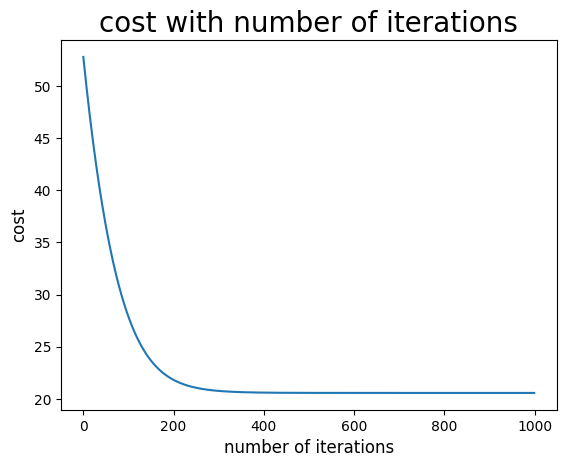

In [18]:
plt.title('cost with number of iterations', fontsize = 20)
plt.xlabel('number of iterations', fontsize = 12)
plt.ylabel('cost', fontsize = 12)

plt.plot(costs)

In batch gradient descent, with the optimal values of parameters - number of iterations, learning rates, etc., you will mostly have non-increasing plot as shown in the previous curve.

**Use indexes of 0, 100, 200, 300, 400 in thetas obtained from batch gradient descent function. They have 4 different theta values. You will need only the first two values out of each 4. For example, the first one will be called intercept while the other can be said as coefficient. Plot a scatter chart to visualize how theta values change. Exemplary image was uploaded.**

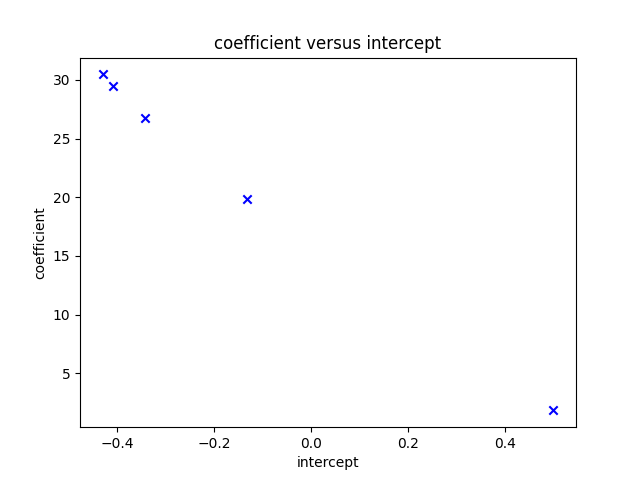

At first glance, the question might seem confusing but I hope the further explanation will make it better.

We want to visualize how theta values change in 2D. So, only two theta values will be sufficient. Imagine you have (θ0, θ1, θ2, θ3). θ0 is intercept and θ1 is the coefficient for feature1. In this task, we are using these two but it doesn't matter which pair you would like to choose. You can try the other possible choices.

In [19]:
## Selecting 5 theta collections with their first two valus
sub_thetas = thetas[[0, 100, 200, 300, 400], :2]

In [20]:
sub_thetas.shape

(5, 2, 1)

In [21]:
intercept = sub_thetas[:, 0]
coefficient_1 = sub_thetas[:, 1]

In [22]:
intercept

array([[-0.49918751],
       [-0.48058725],
       [-0.46419937],
       [-0.45258496],
       [-0.4454545 ]])

In [23]:
coefficient_1

array([[ 0.27244948],
       [19.28325938],
       [26.57054701],
       [29.36468831],
       [30.43631025]])

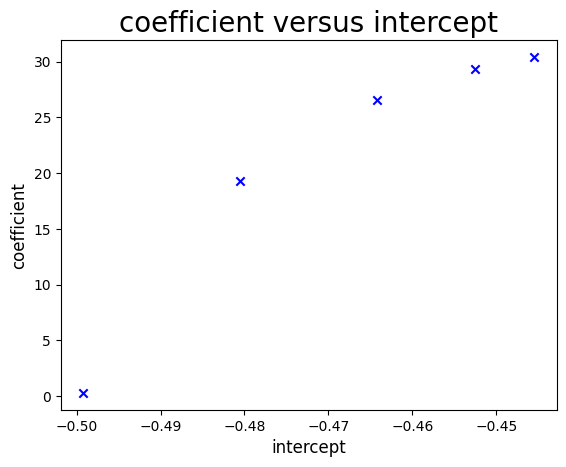

In [24]:
plt.title('coefficient versus intercept', fontsize = 20)
plt.xlabel('intercept', fontsize = 12)
plt.ylabel('coefficient', fontsize = 12)

plt.scatter(intercept, coefficient_1, color = 'blue', marker = 'x')
plt.savefig('coef_vs_intercept.png')

It seems that coefficient_1 continuously decreased while intercept increased. You can use all possible theta collections to visualize more data points and you will always see the similar pattern without any fluctuation in most cases.

**By using the theta values at only 0, 200, and 400 indexes, try to visualize the line graphs that generalize the whole dataset.**

**Since we are interested in 2D visualizations, we will need only two columns - one feature and target. You should make a scatter plot first by using one feature and target, and later visualize linear graph in the corresponding theta values**

Choosing feature 0 and feature 1. One is used for intercept while the other is simply coefficient

In [25]:
new_X = X_b[:, 1:2]
new_X.shape

(2000, 1)

Choosing right thetas for feature 0 and feature 1

In [26]:
sub_thetas = thetas[[0, 200, 400], 1:2]

In [27]:
sub_thetas.shape

(3, 1, 1)

Here, firstly, a scatter chart is plotted with feature 1 and target, and then linear graph is sketched.

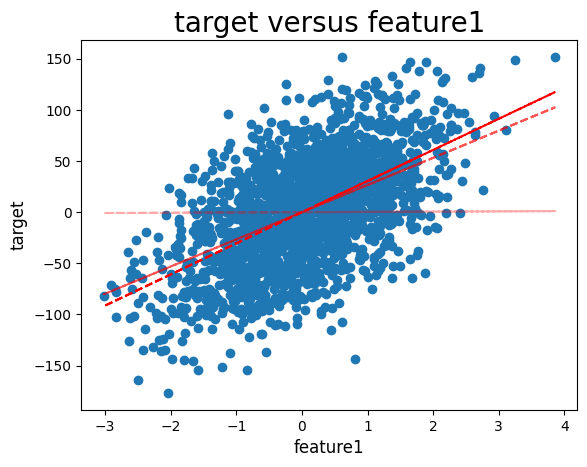

In [28]:
plt.scatter(new_X, y)

plt.title('target versus feature1', fontsize = 20)
plt.xlabel('feature1', fontsize = 12)
plt.ylabel('target', fontsize = 12)

for i in range(sub_thetas.shape[0]):
    ## Prediction with thetas at indexes of 0th, 200th, and 400th 
    new_y_pred = new_X.dot(sub_thetas[i])

    ## Sketching prediction line. Here, alpha parameter is just for decoration. It is not mandatory to include.
    plt.plot(new_X, new_y_pred, color = 'red', alpha = (i + 1) / 3, linestyle = '--')

plt.savefig('linear_curves.png')

In [29]:
new_X.shape, sub_thetas[0].shape

((2000, 1), (1, 1))

_Optional Homework_ **: Use Batch Gradient Descent function again with extremely higher and lower values of alpha for a given number of iteration - 1000. Observe changes in RMSE values. You can plot a graph.**